      Iter       Train Loss   Remaining Time 
         1           1.0190           46.69s
         2           0.9192           42.62s
         3           0.8272           42.45s
         4           0.7834           39.40s
         5           0.7109           39.05s
         6           0.6368           39.40s
         7           0.5797           39.05s
         8           0.5610           36.87s
         9           0.5185           36.82s
        10           0.4984           35.62s
        20           0.1999           35.94s
        30           0.1313           31.97s
        40           0.0790           30.60s
        50           0.0511           29.19s
        60           0.0352           27.41s
        70           0.0245           25.75s
        80           0.0162           24.11s
        90           0.0114           22.42s
       100           0.0077           20.81s
       200           0.0004            6.01s
Learning rate: 1 , min_loss = 0.582 , iter = 0
      I

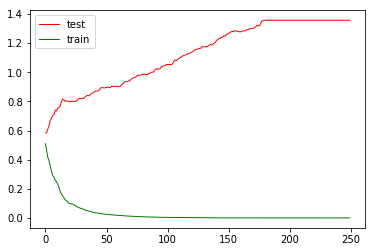

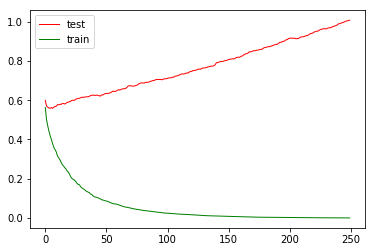

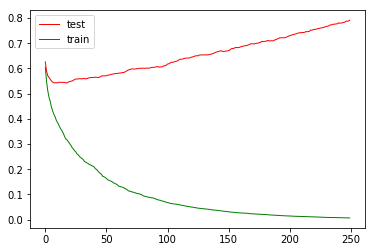

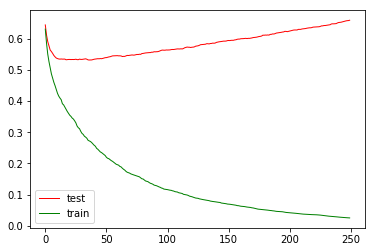

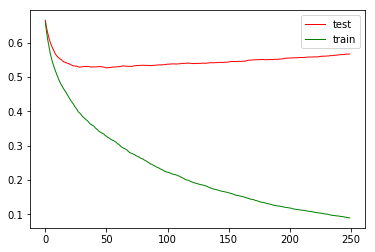

In [160]:
import pandas
import sklearn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt
% matplotlib inline

data = pandas.read_csv('gbm-data.csv')
y = data['Activity'].values
X = data.drop(['Activity'], axis = 1)
# df = pandas.read_csv('gbm-data.csv')
# y = df['Activity'].values
# X = df.loc[:, 'D1':'D1776'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

def sigma_transform(y_pred):
    return 1 / (1 + math.exp(-y_pred))

def calc_loss(estimator, X, y):
    sdf = estimator.staged_decision_function(X)
    loss = []
    for y_pred in sdf:
        loss.append(log_loss(y, [sigma_transform(y_tr) for y_tr in y_pred ]))
    return loss
    
losses = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    gbc = GradientBoostingClassifier(n_estimators = 250, verbose = True, random_state = 241, learning_rate = learning_rate)
    gbc.fit(X_train, y_train)
    loss_train = calc_loss(gbc, X_train, y_train)
    loss_test = calc_loss(gbc, X_test, y_test)
    min_loss = min(loss_test)
    iter_min_loss = loss_test.index(min_loss)
    print('Learning rate:', learning_rate, ', min_loss =',"%.3f" % min_loss, ', iter =', iter_min_loss)
    plt.figure()
    plt.plot(loss_test, 'r', linewidth=1)
    plt.plot(loss_train, 'g', linewidth=1)
    plt.legend(['test', 'train'])
    losses[learning_rate] = [min_loss, iter_min_loss]

print('Overfitting')

loss = pandas.DataFrame(losses).transpose()
loss.rename({0: 'loss', 1: 'iter'}, axis = 1, inplace = True)
loss.index.name = 'rate'
#print (loss)
print('Loss =',"%.3f" % loss['loss'][0.2], ', n_iter =', loss['iter'][0.2])
rfc = RandomForestClassifier(n_estimators = int(loss['iter'][0.2]), random_state = 241)
rfc.fit(X_train, y_train)
y_pred = rfc.predict_proba(X_test)
rfc_loss = log_loss(y_test, y_pred)
print('Random forest classifier loss:', "%.3f" %rfc_loss)